# Employee Churn

In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as matplot
import seaborn as sns 
%matplotlib inline

# Read the data 

In [33]:
df = pd.read_csv('/Users/vjred/Desktop/Employee Churn/HR.csv.txt')

Examine the dataset 

In [34]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data quality check 

In [35]:
#check for any missing values 
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [36]:
# Rename Columns for better readability 
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'Churn'
                        })

In [37]:
df = df.rename(columns={'time_spend_company': 'yearsAtCompany',
                       'Work_accident': 'workAccident'})

In [38]:
df.head()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,Churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [31]:
df.dtypes

satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
turnover                 int64
promotion                int64
department              object
salary                  object
dtype: object

# Exploratory Data Analysis 

In [39]:
#How many employees in the dataset ? 
df.shape

(14999, 10)

In [40]:
#rate of Churn of the company 
Churn_rate = df.Churn.value_counts()/df.shape[0]
Churn_rate

0    0.761917
1    0.238083
Name: Churn, dtype: float64

In [41]:
#Describe the Statistical overview of the employees 
df.describe()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,Churn,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [42]:
#Display the mean summary of Employees (Churn vs Non-Churn)
Churn_Summary = df.groupby('Churn')
Churn_Summary.mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
Churn,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [43]:
#Create a Correlation matrix. To explain what features correlate the most with Churn, what other correlations can be found 
corr = df.corr()
corr

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,Churn,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
Churn,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,Churn,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
Churn,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


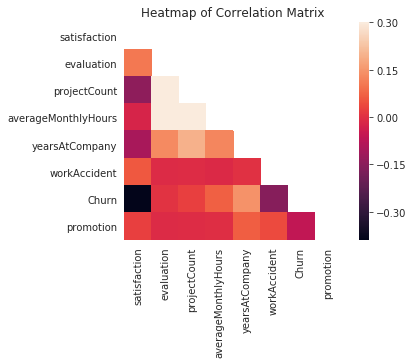

In [44]:
corr = (corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr,
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values, mask=mask, vmax=.3, square=True)
plt.title('Heatmap of Correlation Matrix')
corr

## EDA 1. Distribution of Satisfaction, Evaluation, and Project Count

###### Plot the distribution of Employee Satisfaction, Evaluation, and Project Count. 

C:\Users\vjred\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Employee Count')

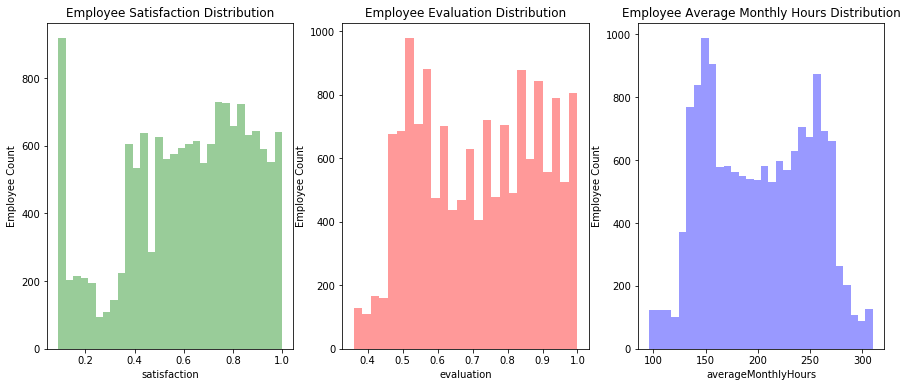

In [45]:
#setup the matplotlib
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

#Graph Employee Satisfaction 
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

#Graph Employee Evaluation 
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

#Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

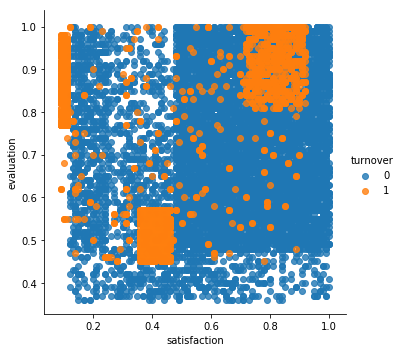

In [17]:
sns.lmplot(x='satisfaction', y='evaluation', data=df, 
          fit_reg=False, #No regression line
          hue='Churn') #color by evolution stage

## Inference 

1) Hard working and sad employees: Satisfaction was less than 0.2 and evalutions were greater than 0.75. It means that its a good indication that employees who left the company were good workers but felt horrible at their job. 

2) Bad and sad employees: satisfaction between 0.35-0.45 and evaluations were greater than 0.8. It means that employees in this cluster were badly evaluated and felt bad at work. 

3) Hard Working and Happy employees: Satisfaction between 0.7-1.0 and evaluations were greater than 0.8. It means that these employees are happy and left for better opportunities. 

## EDA 2. K-Means Clustering of Employee Turnover

In [19]:
from sklearn.cluster import KMeans

#Graph and create 3 clusters of Employee Churn 
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans.fit(df[df.Churn==1][["satisfaction","evaluation"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2, tol=0.0001, verbose=0)

In [ ]:
kmeans_colors = ['green' if c==0 else 'blue' if c==2 else 'red' for c in kmeans.labels_]
fig = plt.figure(figsize=(10,6))
plt.scatter(x="satisfaction",y="evaluation", data = df[df.Churn==1],
            alpha=0.25, color = kmeans_colors) 
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Churn")
plt.show()

## EDA 3. Identifying Cluster Properties

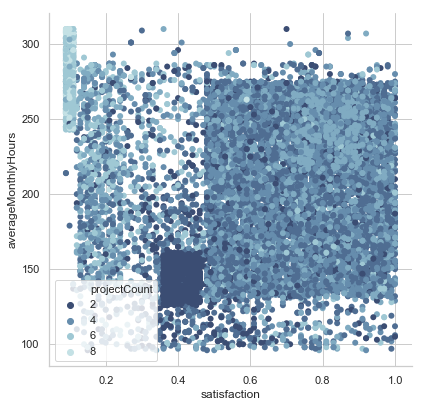

In [21]:
sns.set(style="whitegrid")


# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, right=True, top=True)
sns.scatterplot(x="satisfaction", y="averageMonthlyHours",
                hue="projectCount",
                palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                data=df, ax=ax)

Here, very important thing to notice that out of the three clusters the cluster with low satisfaction and low average monthly hours do approximately 2 projects. Hence, they could be interns and hence such a property of the cluster.

## EDA 4. Employee Satisfaction

Tri-model distribution for employees that turnovered

1) Emplyees who had really low satisfaction score 0.2 or less left the company more. 
2) Employees who had satisfication levels 0.3-0.5 left the company more .
3) Employees who had high satisfaction levels 0.7 or more also left the company. 

In [ ]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Churn'] == 0),'satisfaction'] , color='b',shade=True, label='no Churn')
ax=sns.kdeplot(df.loc[(df['Churn'] == 1),'satisfaction'] , color='r',shade=True, label='Churn')
plt.title('Employee Satisfaction Distribution - Churn V.S. No Churn')


fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Churn'] == 0),'evaluation'] , color='b',shade=True, label='no Churn')
ax=sns.kdeplot(df.loc[(df['Churn'] == 1),'evaluation'] , color='r',shade=True, label='Churn')
plt.title('Employee Satisfaction Distribution - Churn V.S. No Churn')

## EDA 5. Employee department distribution

In [24]:
hrleft = df[df['Churn']==1]

hrleft = pd.DataFrame(hrleft.department.value_counts()).reset_index()
hrstay = pd.DataFrame(df.department.value_counts()).reset_index()

hr_merge = pd.merge(hrleft, hrstay, how='inner', on='index')

hr_merge = hr_merge.rename(columns={"department_x":'left', "department_y":'stay', "index":'department' })
hr_merge

,department,left,stay
0,sales,1014,4140
1,technical,697,2720
2,support,555,2229
3,IT,273,1227
4,hr,215,739
5,accounting,204,767
6,marketing,203,858
7,product_mng,198,902
8,RandD,121,787
9,management,91,630


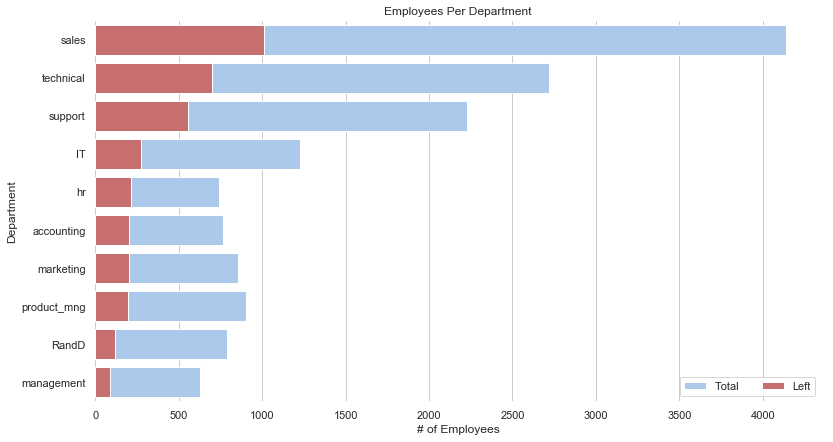

In [25]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the total schools per city
sns.set_color_codes("pastel")
sns.barplot(x="stay", y='department', data=hr_merge,
            label="Total", color="b")

# Plot the total community schools per city
sns.set_color_codes("muted")
sns.barplot(x="left", y="department", data=hr_merge,
            label="Left", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Department", title='Employees Per Department',
       xlabel="# of Employees")
sns.despine(left=True, bottom=True)

# Average Monthly Hours

C:\Users\vjred\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

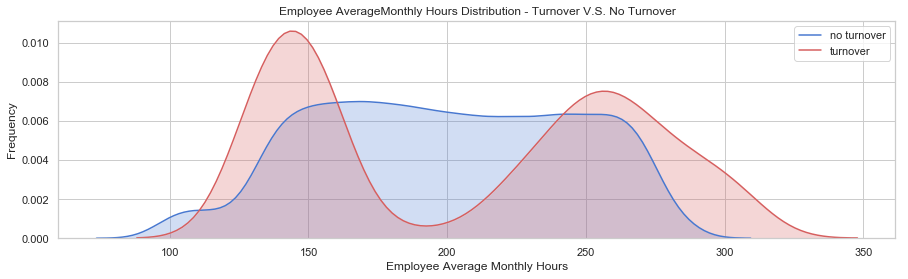

In [26]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Churn'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no Churn')
ax=sns.kdeplot(df.loc[(df['Churn'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='Churn')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Churn V.S. No Churn')

# Preprocessing

In [46]:
cat_var = ['department','salary','Churn','promotion']
num_var = ['satisfaction','evaluation','projectCount','averageMonthlyHours','yearsAtCompany', 'workAccident']
categorical_df = pd.get_dummies(df[cat_var], drop_first=True)
numerical_df = df[num_var]

new_df = pd.concat([categorical_df,numerical_df], axis=1)
new_df.head()

,Churn,promotion,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident
0,1,0,0,0,0,0,0,0,1,0,0,1,0,0.38,0.53,2,157,3,0
1,1,0,0,0,0,0,0,0,1,0,0,0,1,0.80,0.86,5,262,6,0
2,1,0,0,0,0,0,0,0,1,0,0,0,1,0.11,0.88,7,272,4,0
3,1,0,0,0,0,0,0,0,1,0,0,1,0,0.72,0.87,5,223,5,0
4,1,0,0,0,0,0,0,0,1,0,0,1,0,0.37,0.52,2,159,3,0


class imbalance employee turnover rate 24%

# Creating training and test datasets

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

# Create the X and y set
X = new_df.iloc[:,1:]
y = new_df.iloc[:,0]

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=123, stratify=y)

## Balancing datasets based on different sampling techniques

In [49]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

# Upsample using SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)


# Upsample minority class
X_train_u, y_train_u = resample(X_train[y_train == 1],
                                y_train[y_train == 1],
                                replace=True,
                                n_samples=X_train[y_train == 0].shape[0],
                                random_state=1)

X_train_u = np.concatenate((X_train[y_train == 0], X_train_u))
y_train_u = np.concatenate((y_train[y_train == 0], y_train_u))


# Downsample majority class
X_train_d, y_train_d = resample(X_train[y_train == 0],
                                y_train[y_train == 0],
                                replace=True,
                                n_samples=X_train[y_train == 1].shape[0],
                                random_state=1)
X_train_d = np.concatenate((X_train[y_train == 1], X_train_d))
y_train_d = np.concatenate((y_train[y_train == 1], y_train_d))


print("Original shape:", X_train.shape, y_train.shape)
print ("Upsampled SMOTE shape:", x_train_sm.shape, y_train_sm.shape)
print("Upsampled shape:", X_train_u.shape, y_train_u.shape)
print("Downsampled shape:", X_train_d.shape, y_train_d.shape)

Original shape: (11999, 18) (11999,)
Upsampled SMOTE shape: (18284, 18) (18284,)
Upsampled shape: (18284, 18) (18284,)
Downsampled shape: (5714, 18) (5714,)


### In the next part, Different ML techniques are used for prediction. Following are the techniques

Logistic regression
Support Vector Machine (SVM)
Random Forrests 
Gradient Boosting 

Using AUC we check which techniques is most suitable here

### Applying Logistic regression on CV of different sampled data

In [56]:
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Create the Original, Upsampled, and Downsampled training sets
methods_data = {"Original": (X_train, y_train),
                "Upsampled": (X_train_u, y_train_u),
                "SMOTE":(x_train_sm, y_train_sm),
                "Downsampled": (X_train_d, y_train_d)}

# Loop through each type of training sets and apply 5-Fold CV using Logistic Regression
# By default in cross_val_score StratifiedCV is used
for method in methods_data.keys():
    lr_results = cross_val_score(LogisticRegression(), methods_data[method][0], methods_data[method][1], cv=5, scoring='f1')
    print(f"The best F1 Score for {method} data:")
    print (lr_results.mean())
 
print("Cross validation score: ",cross_val_score(LogisticRegression(class_weight='balanced'), X_train, y_train, cv=5, scoring='f1'))
print("Cross validation score mean: ",cross_val_score(LogisticRegression(class_weight='balanced'), X_train, y_train, cv=5, scoring='f1').mean())

The best F1 Score for Original data:
0.4496346788932494
The best F1 Score for Upsampled data:
0.7793364543526724
The best F1 Score for SMOTE data:
0.7880562801129458
The best F1 Score for Downsampled data:
0.7785231984040071
Cross validation score:  [0.58401084 0.6143617  0.60754467 0.62405498 0.6155914 ]
Cross validation score mean:  0.6091127190611549


### ROC results on smote sampling data with logistic regression

In [57]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

# Fit the model to the Upsampling data
lr = lr.fit(x_train_sm, y_train_sm)

print ("\n\n ---Logistic Regression Model---")
lr_auc = roc_auc_score(y_test, lr.predict(X_test))
print ("Logistic Regression AUC = %2.2f" % lr_auc)
print(classification_report(y_test, lr.predict(X_test)))



 ---Logistic Regression Model---
Logistic Regression AUC = 0.78
             precision    recall  f1-score   support

          0       0.93      0.75      0.83      2286
          1       0.51      0.81      0.62       714

avg / total       0.83      0.77      0.78      3000



# SVM

In [58]:
from sklearn.svm import SVC  

svc = SVC(gamma='auto', probability=True)
svc.fit(x_train_sm, y_train_sm)
#print(svc.predict(X_test))

print ("\n\n ---Support Vector machine---")
svm_auc = roc_auc_score(y_test, svc.predict(X_test))

print ("SVM AUC = %2.2f" % svm_auc)

svm2 = svc.fit(x_train_sm, y_train_sm)
print(classification_report(y_test, svc.predict(X_test)))



 ---Support Vector machine---
SVM AUC = 0.94
             precision    recall  f1-score   support

          0       0.98      0.94      0.96      2286
          1       0.83      0.94      0.88       714

avg / total       0.94      0.94      0.94      3000



In [43]:
# SVM model 

svc_result = cross_val_score(svc, x_train_sm, y_train_sm, cv=9, scoring='f1')

svc_result
print(svc_result.mean())

0.9526378012453544


# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()

rf_result = cross_val_score(rf, x_train_sm, y_train_sm, cv=9, scoring='f1')

rf_result
print(rf_result.mean())

0.987773056211537


In [61]:
from sklearn.metrics import roc_auc_score

rf = rf.fit(x_train_sm, y_train_sm)

print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.98
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2286
          1       0.99      0.97      0.98       714

avg / total       0.99      0.99      0.99      3000



# Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()  

gbc = gbc.fit(x_train_sm,y_train_sm)

gbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [63]:
gbc_result = cross_val_score(gbc, x_train_sm, y_train_sm, cv=9, scoring='f1')
gbc_result.mean()

0.9699734699265069

In [64]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Gradient Boosting Model---")
gbc_auc = roc_auc_score(y_test, gbc.predict(X_test))
print ("Gradient Boosting Classifier AUC = %2.2f" % gbc_auc)
print(classification_report(y_test, gbc.predict(X_test)))



 ---Gradient Boosting Model---
Gradient Boosting Classifier AUC = 0.96
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      2286
          1       0.93      0.93      0.93       714

avg / total       0.97      0.97      0.97      3000



# Naive Bayes Model

In [65]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB = NB.fit(x_train_sm, y_train_sm)

nb_result = cross_val_score(NB, x_train_sm, y_train_sm, cv=9, scoring='f1')

nb_result
print(nb_result.mean()) 

0.7201751555003927


In [66]:
from sklearn.metrics import roc_auc_score

print ("\n\n ---Naive Bayes Model---")
nb_auc = roc_auc_score(y_test, NB.predict(X_test))
print ("Naive Bayes AUC = %2.2f" % nb_auc)
print(classification_report(y_test, NB.predict(X_test)))



 ---Naive Bayes Model---
Naive Bayes AUC = 0.65
             precision    recall  f1-score   support

          0       0.92      0.41      0.56      2286
          1       0.32      0.89      0.47       714

avg / total       0.78      0.52      0.54      3000



# KNN Model

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn = knn.fit(x_train_sm, y_train_sm)

knn_result = cross_val_score(knn, x_train_sm, y_train_sm, cv=9, scoring='f1')

knn_result
print(knn_result.mean())

0.9487258131279296


In [54]:
print ("\n\n ---KNN Model---")
knn_auc = roc_auc_score(y_test, knn.predict(X_test))
print ("KNN AUC = %2.2f" % knn_auc)
print(classification_report(y_test, knn.predict(X_test)))



 ---KNN Model---
KNN AUC = 0.94
             precision    recall  f1-score   support

          0       0.99      0.90      0.94      2286
          1       0.75      0.97      0.85       714

avg / total       0.93      0.92      0.92      3000



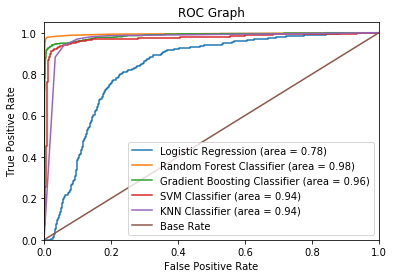

In [67]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])


plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot SVM ROC 
plt.plot(svc_fpr, svc_tpr, label='SVM Classifier (area = %0.2f)' %svm_auc)

# Plot KNN ROC 
plt.plot(knn_fpr, knn_tpr, label='KNN Classifier (area = %0.2f)' % knn_auc)


# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# Random Forest is the best performing classifier among all our models

In [60]:
# Confusion Matrix for Linear Regresion
confusion_matrix(y_test, lr.predict(X_test))

array([[1723,  563],
       [ 134,  580]])

In [61]:
confusion_matrix(y_test, gbc.predict(X_test))

array([[2237,   49],
       [  47,  667]])

In [62]:
confusion_matrix(y_test, svc.predict(X_test))

array([[2151,  135],
       [  44,  670]])

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rf.predict(X_test))

array([[2275,   11],
       [  30,  684]])

#### Feature importances shows which feature is most important to determine the churn rate

In [68]:
# Get Feature Importances
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()
feature_importances

,index,importance
0,yearsAtCompany,0.275485
1,satisfaction,0.240699
2,projectCount,0.150202
3,evaluation,0.137400
4,averageMonthlyHours,0.118724
5,workAccident,0.024104
6,salary_low,0.013618
7,salary_medium,0.009666
8,department_technical,0.007728
9,department_sales,0.004731


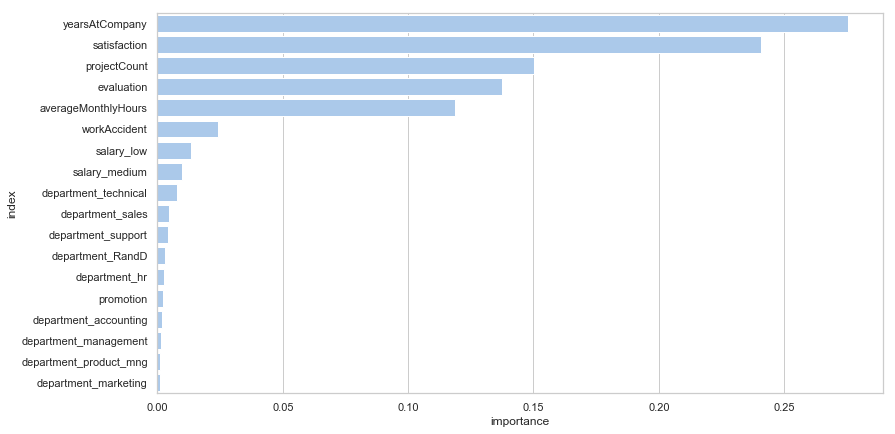

In [69]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(13, 7))

# Plot the Feature Importance
sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,
            label="Total", color="b")

In [70]:
rf.predict_proba(X_test)

array([[1. , 0. ],
       [0.5, 0.5],
       [0.9, 0.1],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ]])

In the above array, Column two shows the probabilty of employee leaving the company. Using this we can take appropriate measures to retain the employee. 

High probabilty employees can be addressed first as they have a high chance of leaving. 

Low probabilty employees can be given more incentives to eliminate the risk of them leaving. 